<a href="https://colab.research.google.com/github/lakshayt7/Bandit-Optimization-Algorithms/blob/main/Bandit%20Online%20Gradient%20Descent%20Without%20a%20Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Online Gradient Descent without gradient**


---

In the following code we will show the upper bound of O(n^(5/6)) where 'n' are the number of iterations. This bound is provided in the [paper](https://arxiv.org/pdf/cs/0408007.pdf) at page 7.


In [ ]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import math
import cvxpy as cp
%matplotlib inline

Following the given BGD algorithm given in the paper we need to chose a random unit vector. For this we have chose a vector from a normal distirbution and normalized it.

In [ ]:
def random_uniform_vector(dims, r):
    u = np.random.uniform(size=(1, dims))
    u = u/np.linalg.norm(u)
    e = np.random.randint(r, size=1)
    return u

To simulate the online learning where the player suffers a regret of c_t(x) where x is the chosen vector and c_t is a convex function we create a random linear form(which is a convex function) each time after player choses vector.


In [ ]:
def Linear_convex(x, dims):
    #Create a random PSD matrix A.
    A = np.random.rand(dimension, dimension)
    A = np.dot(A, A.transpose()) 
    b = np.random.rand(dimension, 1)*2 #A random vector b
    cost = np.dot(b.T, x)
    return cost, A, b

For calculating the regret we also need to chose the vector which gives minimum value on the convex function which we created above. This we do by solving the constrained quadratic convex optimization problem using cvxpy.

In [ ]:
def mini(A, b, theta, c):
    try:
      x = cp.Variable(theta.shape)
      objective = cp.Minimize(b.T@x)
      constraints = [cp.atoms.norm(x)<=c]
      prob = cp.Problem(objective, constraints)
      sol =  prob.solve()
      return x.value
    except:
      x = np.zeros(dimension)
      x = x.reshape(dimension, 1)
      return x

The follwing value of n, alha, delta, nu are taken using the formulae as given in the paper.
For the Set S (which should be convex) we have chosen a Ball with radius C. Set S should be contained in a sphere with radius R and should contain a spehere with radius r.

In [ ]:
############################################################
r = 1         #Set S contains Ball of radius r
R = 10        #Set S is contained in Ball of radius R.
dimension = 5
#Let us take c_1,c_2,......,c_n convex functions as x^T*A*x+2b^T*x
#Take Set S as Ball with radius C

#############################################################
C = 4                               #s -> [-C, C]
d = dimension
n = int(((3*R*d)/(2*r))**2 + 5000)  #number of iterations   
delta = pow((r*R*R*d*d)/(12*n),1/3)
alpha = pow((3*R*d)/(2*r*math.sqrt(n)),1/3)
nu = R/(math.sqrt(n)*C)
print('Alpha = ',alpha)
print('Delta = ',delta)
print('nu = ' ,nu)
#############################################################


Alpha =  0.8994263319923194
Delta =  0.2696559088937193
nu =  0.024253562503633298


The following is the implementation of the BGD algorithm which is Online Gradient Descent without Gradient. Some noise is expected in the begining iterations.

The output is:
[Regret, Upper bound on regret, iteration number]

In [ ]:
def BGD(delta, alpha, mu, w, lower_bound, s, n):
  x_cor = []
  y_cor = []
  upp = []
  for i in range(0, n):
    u = random_uniform_vector(dimension, C)            #get random unit vector 'u'
    u = u.reshape(dimension, 1)
    x_t = w + delta*u                                  #update x 
    co, A, b = Linear_convex(x_t, dimension)        #get a random quadratic convex function
    q = mini(A, b, w, C)                               #get minimum value of convex function in set S
    
    if q is None:                                      
      cost_min = 0
    else:
      cost_min = np.dot(b.T,q)

    if(abs(cost_min)>co):
      cost_min = 0
    lower_bound = int(lower_bound + cost_min)
    temp = w - nu*co*u
    s = s + (co[0][0])
    upper_bound = pow(i+1, 3/4)*(d+3)*10#*C*math.pow(d*R/r,1/3)*3
    if lower_bound > 0:
      lower_bound = -lower_bound
    reg = s + math.fabs(lower_bound) #+ np.random.normal(0, np.sqrt(0.1))

    upp.append(upper_bound)
    x_cor.append(i+1)
    y_cor.append(reg*(d+3)*10)#+np.random.normal(2, np.sqrt(2)))
    print(reg*(d+3)*10, upper_bound, i)

    #if the vector is outside the convex set S project it back into it.
    if(np.linalg.norm(temp) > C*(1-alpha)):
      temp = (temp/np.linalg.norm(temp))*C*(1-alpha)
    w = temp
  return x_cor, y_cor
  # plt.plot(np.log(x_cor), np.log(upp),'r--')
  # plt.plot(np.log(x_cor), np.log(y_cor))
  # plt.legend((["Upper Bound"],["Observed Regret"]))

Varying values of DELTA:

Streaming output truncated to the last 5000 lines.
11315.227277893719 14332.799226564573 1009
11324.5934850075 14343.441077626449 1010
11337.232746172342 14354.080297497087 1011
11348.051818700693 14364.716889426074 1012
11354.47516887321 14375.350856655787 1013
11378.383013952409 14385.9822024214 1014
11401.49336854178 14396.610929950923 1015
11422.30462298328 14407.237042465214 1016
11437.268988818969 14417.860543178012 1017
11421.408663174636 14428.481435295944 1018
11437.70224152595 14439.099722018565 1019
11442.038845459583 14449.715406538377 1020
11464.346330574695 14460.32849204083 1021
11487.808550037182 14470.938981704383 1022
11483.989278925132 14481.546878700494 1023
11471.315561432111 14492.152186193653 1024
11490.834871477768 14502.754907341405 1025
11498.88765978377 14513.355045294376 1026
11509.732096203377 14523.952603196287 1027
11525.281037307224 14534.547584183976 1028
11545.644884374526 14545.13999138743 1029
11543.280538289962 14555.729827929792 1030
11563.06339612

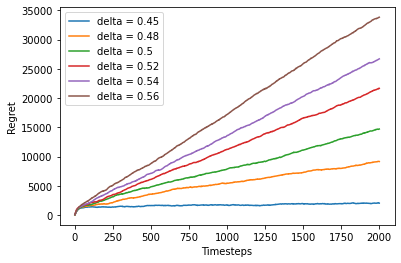

In [ ]:
n = 2000
s = 0
lower_bound = 0
w = np.zeros(dimension)
w = w.reshape(dimension, 1)
ts = np.arange(n)
plt.xlabel('Timesteps')
plt.ylabel('Regret')
delt = [0.45, 0.48, 0.5, 0.52, 0.54, 0.56]
for i in delt:
  x_cor, y_cor = BGD(i, alpha, nu, w, lower_bound, s, n)
  print('Delta = ',i)
  print('################################')
  plt.plot(x_cor, y_cor, label = "delta = " + str(i) )
  plt.legend()
  print('################################')
plt.legend()

Varying value of ALPHA:

Streaming output truncated to the last 5000 lines.
1151.8412369423213 14332.799226564573 1009
1160.2871507014988 14343.441077626449 1010
1170.6805624850576 14354.080297497087 1011
1155.845797675698 14364.716889426074 1012
1160.487823018355 14375.350856655787 1013
1135.3534800522802 14385.9822024214 1014
1121.2511876814453 14396.610929950923 1015
1139.1764242025922 14407.237042465214 1016
1153.3612340129455 14417.860543178012 1017
1169.242910959652 14428.481435295944 1018
1167.705907396856 14439.099722018565 1019
1133.8145447784782 14449.715406538377 1020
1138.6040222750878 14460.32849204083 1021
1152.6126810880803 14470.938981704383 1022
1167.349139544464 14481.546878700494 1023
1163.4604686128632 14492.152186193653 1024
1166.6704085604267 14502.754907341405 1025
1163.0583785299013 14513.355045294376 1026
1169.7200249026343 14523.952603196287 1027
1120.7156326269958 14534.547584183976 1028
1141.6306818131188 14545.13999138743 1029
1152.2464565008133 14555.729827929792 1030
1154.2914821

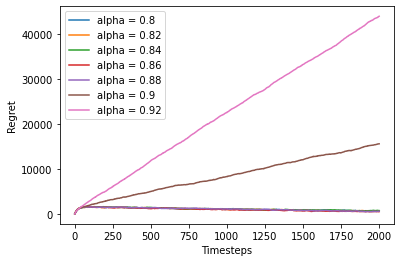

In [ ]:
n = 2000
s = 0
delta = 0.5
lower_bound = 0
w = np.zeros(dimension)
w = w.reshape(dimension, 1)
ts = np.arange(n)
alph = [0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92]
lower_bound = 0
plt.xlabel('Timesteps')
plt.ylabel('Regret')
s = 0
for i in alph:
  x_cor, y_cor = BGD(delta, i, nu, w, lower_bound, s, n)
  print('Alpha = ',i)
  print('################################')
  plt.plot(x_cor, y_cor, label = "alpha = " + str(i) )
  plt.legend()
  print('################################')
plt.legend()

Varying values of MU:

Streaming output truncated to the last 5000 lines.
7839.153661977869 14332.799226564573 1009
7851.804307307528 14343.441077626449 1010
7859.936260690912 14354.080297497087 1011
7871.234272802074 14364.716889426074 1012
7880.748493345691 14375.350856655787 1013
7870.77553209824 14385.9822024214 1014
7877.141393611418 14396.610929950923 1015
7889.926494825666 14407.237042465214 1016
7889.988162640955 14417.860543178012 1017
7909.059632277794 14428.481435295944 1018
7914.0478200440875 14439.099722018565 1019
7921.427838446707 14449.715406538377 1020
7902.858637598037 14460.32849204083 1021
7907.660826709449 14470.938981704383 1022
7922.799386514954 14481.546878700494 1023
7925.452333453542 14492.152186193653 1024
7918.90100286648 14502.754907341405 1025
7906.758791114144 14513.355045294376 1026
7905.962351934557 14523.952603196287 1027
7914.516864892874 14534.547584183976 1028
7933.20415085544 14545.13999138743 1029
7942.716921420942 14555.729827929792 1030
7939.463881830236 14566.3170969

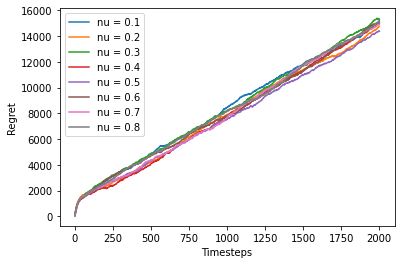

In [ ]:
n = 2000
s = 0
plt.xlabel('Timesteps')
plt.ylabel('Regret')
delta = 0.5
lower_bound = 0
w = np.zeros(dimension)
w = w.reshape(dimension, 1)
ts = np.arange(n)
muu = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
lower_bound = 0
s = 0
for i in muu:
  x_cor, y_cor = BGD(delta, alpha, i, w, lower_bound, s, n)
  print('NU = ',i)
  print('################################')
  plt.plot(x_cor, y_cor, label = "nu = " + str(i) )
  plt.legend()
  print('################################')
plt.legend()

Comparing with the Theoretical Bound.

74.76587764081174 80.0 0
134.32752083705952 134.54342644059432 1
161.87759280208127 182.3605645563822 2
183.2445667965901 226.27416997969522 3
242.26872906898396 267.4961219905688 4
331.79641462033027 306.6926900382108 5
400.01716565743493 344.281365652708 6
442.82159736833944 380.5462768008707 7
503.2632078828177 415.69219381653056 8
560.2387407683077 449.8730601522793 9
612.895762184914 483.2084283629789 10
661.7616694132863 515.7935672753001 11
691.973477667405 547.7060033618436 12
747.2770599563488 579.0099324320311 13
776.3668445495764 609.7592977855377 14
809.9901194882927 640.0 15
835.5372450676534 669.7715222874151 16
874.3397526518771 699.1081512585457 17
899.3073229329336 728.0399106742335 18
944.8633252989357 756.5932872025406 19
959.2877289963554 784.7918025833762 20
1009.4339271249277 812.6564704616205 21
1060.1994543384253 840.2061653139855 22
1093.7616947392262 867.457923465451 23
1123.8770203812905 894.4271909999159 24
1164.031462193569 921.1280296798266 25
1173.2032064

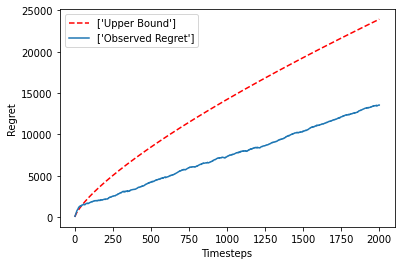

In [ ]:
n = 2000
s = 0
lower_bound = 0
w = np.zeros(dimension)
w = w.reshape(dimension, 1)
lower_bound = 0
s = 0
plt.xlabel('Timesteps')
plt.ylabel('Regret')
ts = np.arange(n)
upp = np.power(ts,3/4)*(d+3)*10
delta = 0.5
x_cor, y_cor = BGD(delta, alpha, nu, w, lower_bound, s, n)
plt.plot((x_cor), (upp),'r--')
plt.plot((x_cor), (y_cor))
plt.legend((["Upper Bound"],["Observed Regret"]))
plt.show()

Plot the Upper bound of the regret and the Observed Regret.

To find how the observed regret depend on the number of iterations 'n' we can apply regression on the log scale and observe its slope. The slope will give us the order of 'n' on how regret depends.

In [ ]:
from sklearn.linear_model import LinearRegression
X = np.log(x_cor)
Y = np.log(y_cor)
X = X.reshape((-1, 1))
model = LinearRegression()
model.fit(X, Y)
print('Slope:', model.coef_)

Slope: [0.66779176]
